In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



## Gradient descent

Forest analogy: You're lost in the mountain and has to find your way down

![](https://upload.wikimedia.org/wikipedia/commons/c/c7/Okanogan-Wenatchee_National_Forest%2C_morning_fog_shrouds_trees_%2837171636495%29.jpg)

## Gradient descent

* Gradient descent is an iterative optimization algorithm for finding the minimum of a function.

Math analogy: You have a function, and the only thing you know is the *direction* it moves

In multiple dimensions the *direction* is in multiple dimensions. So we don't just need the derivative of the function in one dimension, we need it in multiple dimensions! 

We need the gradients! That's why it's called gradient descent.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg" style="width:40%"/>

## Gradients

A function $f$ can require a number of inputs.
So how do we find the gradient for one of the inputs? If we keep the others constant!



$\nabla f(a) = \left(\frac{\partial f}{\partial x_1}(a), \ldots, \frac{\partial f}{\partial x_n}(a)\right)$

In one point $a$, this gives us a list of partial derivatives, that tells us which direction each dimension is moving, in that exact point $a$.

This is called a **gradient**.

## The gradient descent algorithm

Let's revisit the science/suicide dataset:


In [3]:
import pandas as pd
df = pd.read_csv('science.csv')

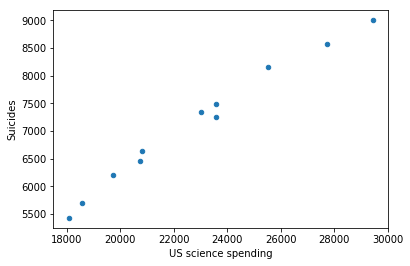

In [4]:
df.plot.scatter(x=1, y=2)

We're still going for a *linear* relationship:

$$f(x) = \alpha x + \beta$$

And our loss function is still:

$$l = {{\sum^N_{i=1}(y_i - \hat{y_i})^2} \over N}$$

Which is the same as:

$$l = {{1 \over N} \sum^N_{i=1}(y_i - (\alpha x_i + \beta))^2}$$

We now know what to optimise! We have a loss function with two parameters: $\alpha$ and $\beta$.


$$l = {{1 \over N} \sum^N_{i=1}(y_i - (\alpha x_i + \beta))^2}$$

So we have to find the **partial** derivative for $\alpha$:

$${\partial l \over \partial \alpha} = {{1 \over N} \sum^N_{i=1} -2x_i(y_i - (\alpha x_i + \beta))}$$

We now know what to optimise! We have a loss function with two parameters: $\alpha$ and $\beta$.


$$l = {{1 \over N} \sum^N_{i=1}(y_i - (\alpha x_i + \beta))^2}$$

So we have to find the **partial** derivative for $\beta$:

$${\partial l \over \partial \beta} = {{1 \over N} \sum^N_{i=1} -2(y_i - (\alpha x_i + \beta))}$$

To start gradient descent, let's just pretend that $\alpha$ and $\beta$ are set to 0.

Whenever vi find a gradient, we get a **direction** at that specific point.
* If the gradient is positive, the function grows
* If the gradient is negative, the function declines

... Either is actuall bad, because we want the function to stay at zero!
So we will always move **in the opposite direction** of the gradient.

We can now update our parameters:

$$\alpha \leftarrow \alpha - {\partial l \over \partial \alpha} $$

$$\beta \leftarrow \beta - {\partial l \over \partial \beta} $$

## Learning rates

Gradient descent has a problem: local minima.

We can add a *learning rate* that scales the amount we are learning (between 0 and 1).

The learning rate will prevent us from 'jumping' too far.

We can now update our parameters with a learning rate $\gamma$:

$$\alpha \leftarrow \alpha - \gamma {\partial l \over \partial \alpha} $$

$$\beta \leftarrow \beta - \gamma {\partial l \over \partial \beta} $$

## Gradient descent in Python

In [5]:
def loss(spendings, suicides, a, b):
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (suicides[i] - (a*spendings[i] + b))**2
    return total_error / N

In [6]:
def update_a_and_b(spendings, suicides, a, b, gamma):
    dr_da = 0.0
    dr_db = 0.0
    N = len(spendings)

    for i in range(N):
        dr_da += -2 * spendings[i] * (suicides[i] - (a * spendings[i] + b))
        dr_db += -2 * (suicides[i] - (a * spendings[i] + b))

    # update a and b
    a = a - (dr_da/float(N)) * gamma
    b = b - (dr_db/float(N)) * gamma

    return a, b

In [7]:
def train(spendings, suicides, a, b, gamma, epochs):
    image_counter = 2
    for e in range(epochs):
        a, b = update_a_and_b(spendings, suicides, a, b, gamma)

        if (e % 10 == 0):
            # log the progress
            print("epoch: ", str(e), "loss: "+str(loss(spendings, suicides, a, b)))
            print("a, b: ", a, b)
            plt.figure(image_counter)
            axes = plt.gca()
            plt.scatter(spendings, suicides)
            plt.plot(spendings, spendings*a + b)
            image_counter += 1
            
        if np.isnan(a):
            raise ValueError('Infinite error!')

epoch:  0 loss: 5.8720398691147317e+23
a, b:  33206725.072727278 1422.2545454545455
epoch:  10 loss: 2.070746926362161e+184
a, b:  6.235841347929989e+87 2.6710161256055656e+83
epoch:  20 loss: inf
a, b:  1.171019352149384e+168 5.0158613705357914e+163
epoch:  30 loss: inf
a, b:  2.1990397872511095e+248 9.419211305858082e+243


/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


ValueError: Infinite error!

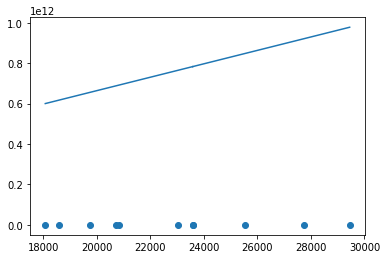

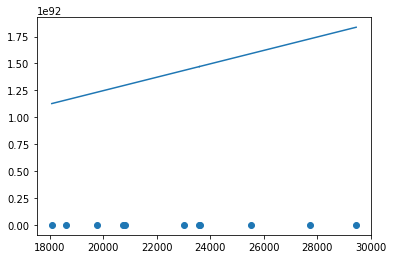

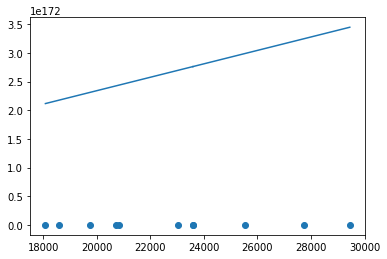

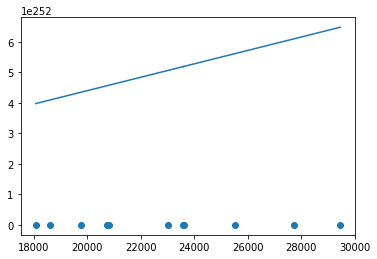

In [8]:
train(df['US science spending'], df['Suicides'], 0, 0, 0.1, 10000)

## Scaling data

Gradient descent is sensitive to big numbers:

* Large gradients = large movements = large losses = large gradients = ...

Solution: scale the data so it centers around 0

In [9]:
from sklearn.preprocessing import StandardScaler

In [13]:
data = np.arange(0, 1000).reshape(-1, 1)

In [14]:
StandardScaler().fit(data).transform(data)

/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.73031962],
       [-1.72685552],
       [-1.72339142],
       [-1.71992731],
       [-1.71646321],
       [-1.71299911],
       [-1.709535  ],
       [-1.7060709 ],
       [-1.7026068 ],
       [-1.69914269],
       [-1.69567859],
       [-1.69221449],
       [-1.68875038],
       [-1.68528628],
       [-1.68182218],
       [-1.67835807],
       [-1.67489397],
       [-1.67142987],
       [-1.66796576],
       [-1.66450166],
       [-1.66103755],
       [-1.65757345],
       [-1.65410935],
       [-1.65064524],
       [-1.64718114],
       [-1.64371704],
       [-1.64025293],
       [-1.63678883],
       [-1.63332473],
       [-1.62986062],
       [-1.62639652],
       [-1.62293242],
       [-1.61946831],
       [-1.61600421],
       [-1.61254011],
       [-1.609076  ],
       [-1.6056119 ],
       [-1.6021478 ],
       [-1.59868369],
       [-1.59521959],
       [-1.59175549],
       [-1.58829138],
       [-1.58482728],
       [-1.58136318],
       [-1.57789907],
       [-1

In [ ]:
StandardScaler().fit(data.reshape(-1, 1)).transform(data.reshape(-1, 1))

In [15]:
StandardScaler().fit_transform(data.reshape(-1, 1))

/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.73031962],
       [-1.72685552],
       [-1.72339142],
       [-1.71992731],
       [-1.71646321],
       [-1.71299911],
       [-1.709535  ],
       [-1.7060709 ],
       [-1.7026068 ],
       [-1.69914269],
       [-1.69567859],
       [-1.69221449],
       [-1.68875038],
       [-1.68528628],
       [-1.68182218],
       [-1.67835807],
       [-1.67489397],
       [-1.67142987],
       [-1.66796576],
       [-1.66450166],
       [-1.66103755],
       [-1.65757345],
       [-1.65410935],
       [-1.65064524],
       [-1.64718114],
       [-1.64371704],
       [-1.64025293],
       [-1.63678883],
       [-1.63332473],
       [-1.62986062],
       [-1.62639652],
       [-1.62293242],
       [-1.61946831],
       [-1.61600421],
       [-1.61254011],
       [-1.609076  ],
       [-1.6056119 ],
       [-1.6021478 ],
       [-1.59868369],
       [-1.59521959],
       [-1.59175549],
       [-1.58829138],
       [-1.58482728],
       [-1.58136318],
       [-1.57789907],
       [-1

In [16]:
scaled_spending = StandardScaler().fit_transform(df['US science spending'].values.reshape(-1, 1))
scaled_suicides = StandardScaler().fit_transform(df['Suicides'].values.reshape(-1, 1))

/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


epoch:  0 loss: [0.96102465]
a, b:  [0.01984163] [5.65204449e-18]
epoch:  10 loss: [0.64683085]
a, b:  [0.19769078] [4.76386607e-17]
epoch:  20 loss: [0.43707256]
a, b:  [0.34300647] [8.8010407e-17]
epoch:  30 loss: [0.29703626]
a, b:  [0.46173998] [1.20307804e-16]
epoch:  40 loss: [0.20354691]
a, b:  [0.5587539] [1.54825647e-16]
epoch:  50 loss: [0.14113267]
a, b:  [0.63802133] [1.80663565e-16]
epoch:  60 loss: [0.09946443]
a, b:  [0.7027886] [2.01656873e-16]
epoch:  70 loss: [0.07164638]
a, b:  [0.75570817] [2.19824159e-16]
epoch:  80 loss: [0.05307483]
a, b:  [0.79894731] [2.39202597e-16]
epoch:  90 loss: [0.04067631]
a, b:  [0.83427684] [2.57571742e-16]
epoch:  100 loss: [0.03239896]
a, b:  [0.86314364] [2.75739028e-16]
epoch:  110 loss: [0.02687294]
a, b:  [0.88672991] [2.88456128e-16]
epoch:  120 loss: [0.02318372]
a, b:  [0.90600161] [2.96833265e-16]
epoch:  130 loss: [0.02072077]
a, b:  [0.921748] [3.06623414e-16]
epoch:  140 loss: [0.01907648]
a, b:  [0.93461394] [3.16413562e-

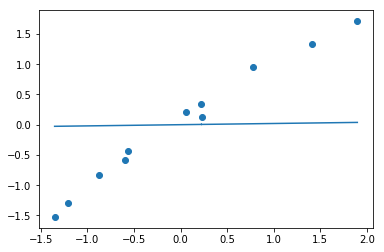

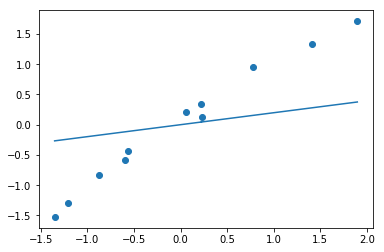

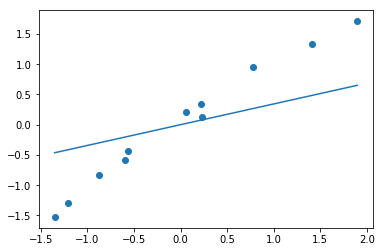

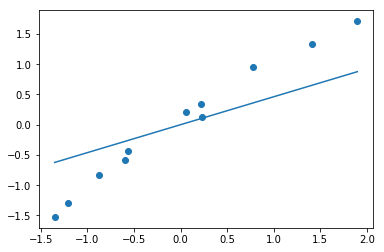

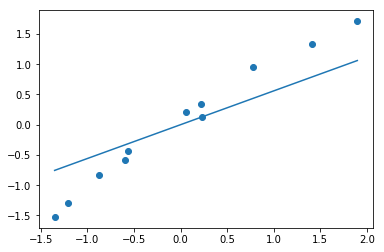

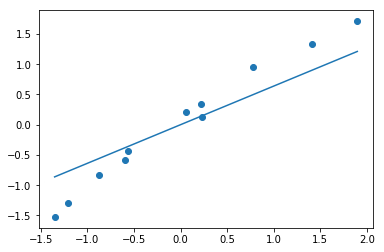

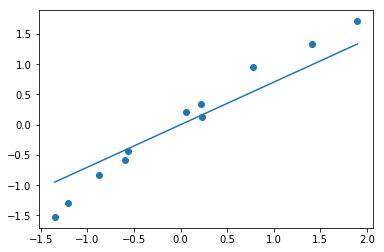

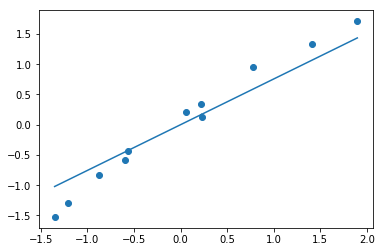

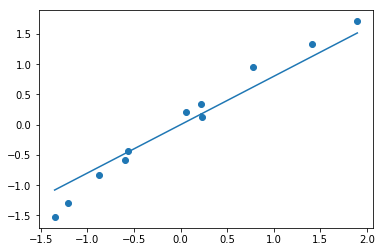

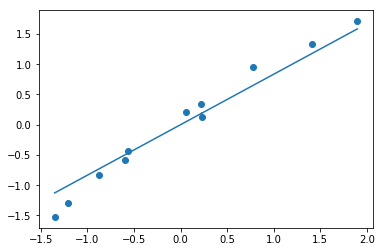

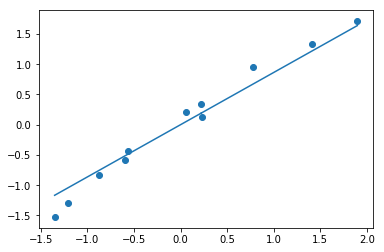

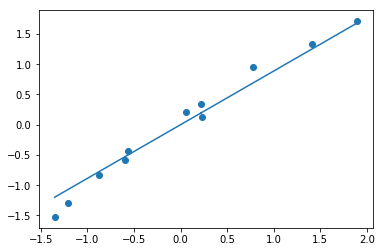

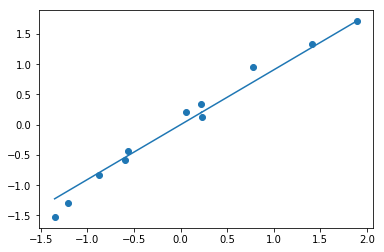

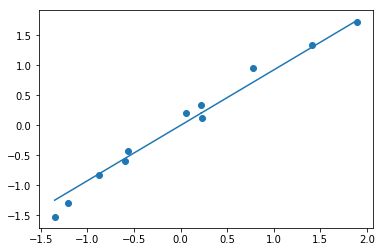

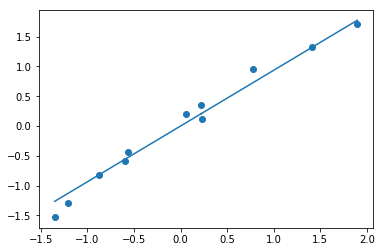

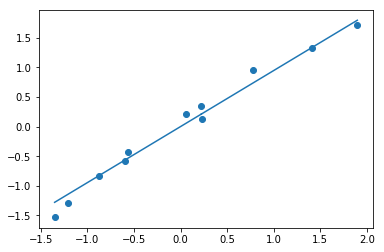

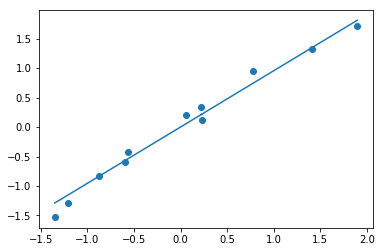

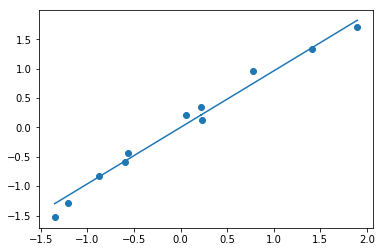

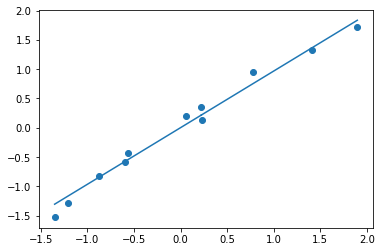

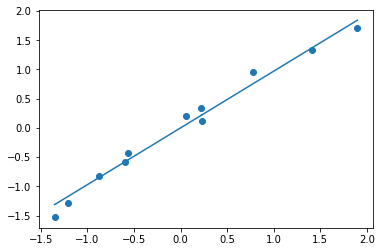

In [18]:
train(scaled_spending, scaled_suicides, 0, 0, 0.01, 200)

## Gradient descent in `sklearn`

## Gradient descent: summary

* We have a loss function for our models
  * We like our loss to be **small**
* That loss function can be in multiple dimensions
  * It's **hard** to predict where the loss function is small
* Gradients gives us an idea on the *direction* the function is going
  * Direction **small** is good because it means a small loss

* Gradient descent steps in the direction of the loss
  * Until you find the smallest point

In [19]:
from sklearn.linear_model import SGDRegressor
SGDRegressor?

## Gradient descent example in sklearn

In [20]:
import pandas as pd
data = pd.read_csv("science.csv")
data

,Year,US science spending,Suicides
0,1999,18079,5427
1,2000,18594,5688
2,2001,19753,6198
3,2002,20734,6462
4,2003,20831,6635
5,2004,23029,7336
6,2005,23597,7248
7,2006,23584,7491
8,2007,25525,8161
9,2008,27731,8578


In [21]:
xs = np.array(data['US science spending']).reshape(-1, 1)
ys = np.array(data['Suicides']).reshape(-1, 1)

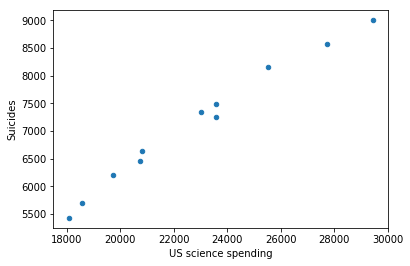

In [22]:
data.plot.scatter(x = 1, y = 2)

In [26]:
model = SGDRegressor(n_iter=10000)
model.fit(xs, ys)

/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=10000, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [27]:
model.predict([[100], [10000]])

array([-1.1709098e+15, -1.1709196e+17])

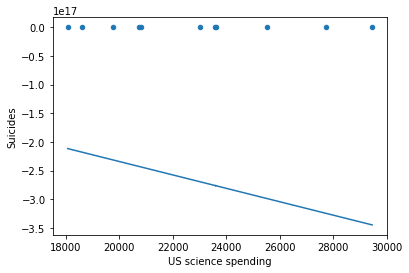

In [28]:
data.plot.scatter(x = 1, y = 2)
plt.plot(xs, model.predict(xs))

## Scaling data

Gradient descent goes in the direction of the gradient with respect to x.
If that gradient is very large, the steps we take are laaaarge.

What can we do to fix that?
Scale the data to be smaller!

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
xs_scaled = StandardScaler().fit_transform(xs)
xs_scaled

/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.35206864],
       [-1.2048759 ],
       [-0.87362077],
       [-0.59324003],
       [-0.56551634],
       [ 0.06269657],
       [ 0.22503731],
       [ 0.22132177],
       [ 0.77608122],
       [ 1.40658062],
       [ 1.89760419]])

In [35]:
model = SGDRegressor(n_iter=10000)
model.fit(xs_scaled, ys)

/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=10000, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

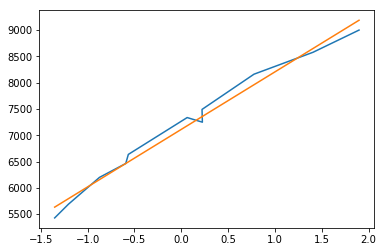

In [36]:
plt.plot(xs_scaled, ys)
plt.plot(xs_scaled, model.predict(xs_scaled))

## Why don't we get any good results?!

To get the optimal solution, we have to take many steps towards the correct solution. 

## Exercise: 

* Use the `SGDRegressor` to fit a model
* Figure out how many steps the model is taking
* Increase that step to, say, 1000 and see whether your prediction is better
* What happens if you increase the steps to 10000?

## Recap

* Derivatives
  * The **rate of growth** for a function $f$
  * Normally defined at points like $x$: $f'(x)$
* Partial derivatives
  * Derivatives in multiple dimensions

* Gradient
  * A vector of derivatives, one for each dimension in a function $f$
* Gradient descent
  * A way to optimise a function by moving towards an optimum
  * For instance minimising a loss function